In [1]:
from riskyneuroarousal.utils.load_data import load_behavioral_data
from riskyneuroarousal.config import Config
import seaborn as sns
import matplotlib.pyplot as plt

Before you start, make sure to go to `config.json` in the beginning of this repository and include your userID and the paths to the necessary files (listed in the json).

### Load the behavioral 
There are 108 participants that participated in a risky-decision task, namely a version of the gambling task. Each participant was shown a gamble with the possibility of winning some gain or losing some lose (50/50 chance).  They had to respond if they (1) strongly reject, (2) weakly reject, (3) weakly accept or (4) strongly accept. Once they finished going through all the gambles, they would see the outcome of their decisions. 

There were two conditions, which only differed in the range of gains that a participant would see during the experiment. 
1. EqualRange Condition: The range of gains and losses would be the same ($5-$20, increments of $1). 
2. EqualIndifference Condition: The range of gains would be double the amount of the range of the losses (gains are $10-$40, increments of $2; losses are $5-$20, increments of $1)

For both conditions, there were 256 trials in total.

In [2]:
data = load_behavioral_data()
data.head()

,sub,run,condition,gain,loss,RT,accept,response_int,participant_response,trial
0,1,1,equalIndifference,14,6,2.388,1,3.0,weakly_accept,1
1,1,1,equalIndifference,34,14,2.289,1,4.0,strongly_accept,2
2,1,1,equalIndifference,34,13,1.873,1,4.0,strongly_accept,3
3,1,1,equalIndifference,10,10,1.457,0,2.0,weakly_reject,4
4,1,1,equalIndifference,12,19,1.973,0,1.0,strongly_reject,5


Lets look at the range of the gambles for both conditions and plot the acceptance rate. The "accept" column is 1 if the participant strongly or weakly accepted and 0 otherwise. 

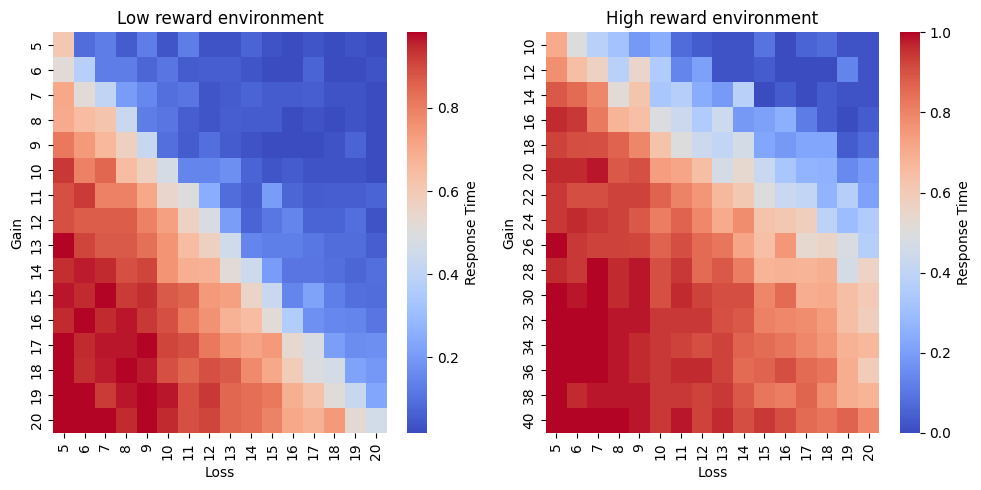

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
hmap_data = (
    data.query("condition == 'equalRange'")
    .groupby(["gain", "loss"])["accept"]
    .mean()
    .unstack()
)
sns.heatmap(hmap_data, cmap="coolwarm", cbar_kws={"label": "Response Time"}, ax=axs[0])
axs[0].set_title("Low reward environment")
axs[0].set_xlabel("Loss")
axs[0].set_ylabel("Gain")

hmap_data = (
    data.query("condition == 'equalIndifference'")
    .groupby(["gain", "loss"])["accept"]
    .mean()
    .unstack()
)
sns.heatmap(hmap_data, cmap="coolwarm", cbar_kws={"label": "Response Time"}, ax=axs[1])
axs[1].set_title("High reward environment")
axs[1].set_xlabel("Loss")
axs[1].set_ylabel("Gain")
plt.tight_layout()
plt.show()

### Load the eye tracking data
I only included the data for one participant

In [4]:
%load_ext rpy2.ipython

In [5]:
config = Config()
pth_file = config.data_path[config.username]

In [6]:
%%R 
source("../../src/preprocessing/load_data.R")

In [7]:
%%R -i pth_file 
pth_file <- paste(pth_file, "/sub-003_run-1.asc", sep= "")
valid_subs <- c("sub-003")

# Load the data
loaded_data <- load_data(pth_file, valid_subs)
str(loaded_data)

[1] "Processing sub-003 run-1"
List of 5
 $ data       :List of 6
  ..$ file      : chr "/Users/gustxsr/Documents/Stanford/PoldrackLab/github/riskyneuroarousal/data/sub-003_run-1.asc"
  ..$ timeseries: tibble [224,614 × 7] (S3: tbl_df/tbl/data.frame)
  .. ..$ time_orig: int [1:224614] 627855 627857 627859 627861 627863 627865 627867 627869 627871 627873 ...
  .. ..$ eye_x    : num [1:224614] 964 964 963 962 963 ...
  .. ..$ eye_y    : num [1:224614] 560 560 560 558 555 ...
  .. ..$ eye      : chr [1:224614] "R" "R" "R" "R" ...
  .. ..$ hz       : num [1:224614] 500 500 500 500 500 500 500 500 500 500 ...
  .. ..$ type     : chr [1:224614] "diameter" "diameter" "diameter" "diameter" ...
  .. ..$ pupil_raw: num [1:224614] 6586 6591 6596 6600 6606 ...
  ..$ events    : tibble [130 × 3] (S3: tbl_df/tbl/data.frame)
  .. ..$ block: num [1:130] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ time : num [1:130] 627855 627934 627969 629226 632947 ...
  .. ..$ text : chr [1:130] "!MODE RECORD CR 500 2 1 R" "fl